In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import random
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import umap

In [50]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [51]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [64]:
x = []
y = []
original_data = []
dir = '/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/code/monthly/jan2024/wk2/process_data/data'
for f in os.listdir(dir): 
    data = pd.read_csv(os.path.join(dir, f))
    x = np.array(data['x'])
    y.append(np.array(data['y']))
    original_df = pd.read_csv(os.path.join('/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/code/monthly/oct2023/wk1/bulk-first/data/processed_data', f), sep=' ')
    original_df.columns = ['wave', 'flux']
    original_data.append(original_df)

y = np.array(y)
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

y_train, y_test = train_test_split(y, test_size=0.1)

In [53]:
shape = y.shape[1:]
latent_dim = 40
autoencoder = Autoencoder(latent_dim, shape)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [54]:
history = autoencoder.fit(y_train, y_train,
                epochs=100,
                shuffle=True,
                validation_data=(y_test, y_test))
autoencoder.summary()

Epoch 1/100
6/6 [==============================] - 0s 10ms/step - loss: 0.1436 - val_loss: 0.1437
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.1290 - val_loss: 0.1250
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1018 - val_loss: 0.0997
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0714 - val_loss: 0.0742
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0488 - val_loss: 0.0578
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0386 - val_loss: 0.0506
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0344 - val_loss: 0.0478
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0332 - val_loss: 0.0467
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0328 - val_loss: 0.0462
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0326 - val_loss: 0.0457
Epoch 11/100
6/6 [==========

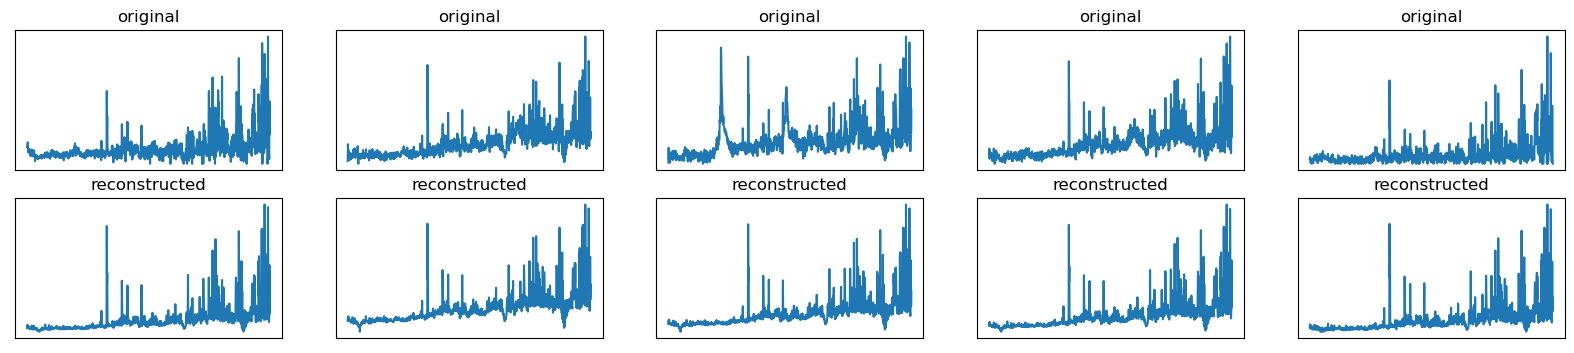

In [55]:
encoded_imgs = autoencoder.encoder(y_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.plot(x, y_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.plot(x, decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

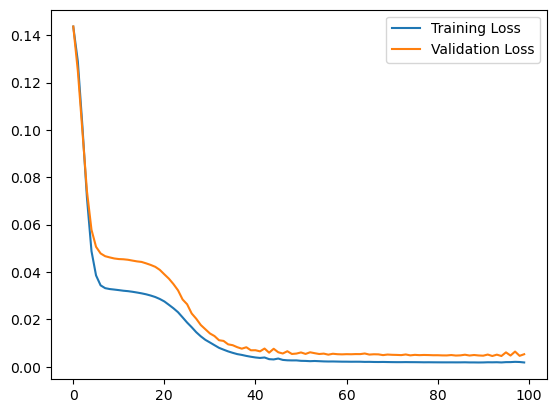

In [56]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [66]:
history = autoencoder.fit(y, y,
                epochs=100,
                shuffle=True)

latent_space = autoencoder.encoder(y)

Epoch 1/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 2/100
6/6 [==============================] - 0s 847us/step - loss: 0.0013
Epoch 3/100
6/6 [==============================] - 0s 758us/step - loss: 0.0013
Epoch 4/100
6/6 [==============================] - 0s 944us/step - loss: 0.0013
Epoch 5/100
6/6 [==============================] - 0s 719us/step - loss: 0.0013
Epoch 6/100
6/6 [==============================] - 0s 751us/step - loss: 0.0013
Epoch 7/100
6/6 [==============================] - 0s 805us/step - loss: 0.0013
Epoch 8/100
6/6 [==============================] - 0s 764us/step - loss: 0.0012
Epoch 9/100
6/6 [==============================] - 0s 797us/step - loss: 0.0012
Epoch 10/100
6/6 [==============================] - 0s 844us/step - loss: 0.0013
Epoch 11/100
6/6 [==============================] - 0s 780us/step - loss: 0.0012
Epoch 12/100
6/6 [==============================] - 0s 744us/step - loss: 0.0012
Epoch 13/100
6/6 [=====================

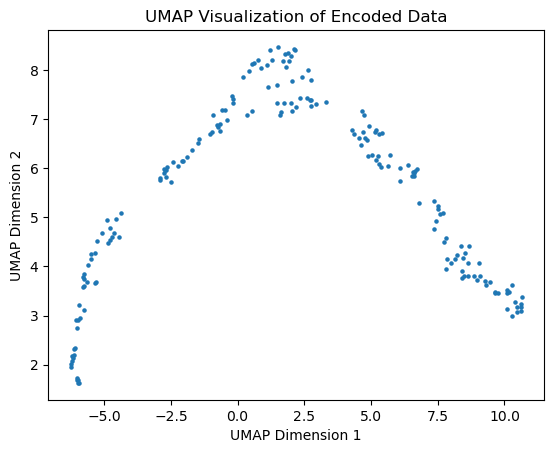

In [72]:
reducer = umap.UMAP(n_components=2)
reduced_data = reducer.fit_transform(latent_space)

# Plot the Reduced Data 

umap_x = reduced_data[:, 0]
umap_y = reduced_data[:, 1]

plt.scatter(umap_x, umap_y, s=5)
plt.title("UMAP Visualization of Encoded Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.savefig('/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/code/monthly/jan2024/wk2/process_data/results/plots/umap.png')

#### experiment with quality of groups

def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def find_closest_points(x_values, y_values, x_coord, y_coord, k=3):
    distances = np.sqrt((x_values - x_coord)**2 + (y_values - y_coord)**2)
    closest_indices = np.argsort(distances)[::-1][:3]
    return closest_indices

for i in range(10): 
    idx = random.randrange(0, len(y)) 

    x1 = umap_x[idx]
    y1 = umap_y[idx]

    original_df = original_data[idx]

    closest_indices = find_closest_points(umap_x,umap_y,x1,y1)

    fig, axs = plt.subplots(4, 1, figsize=(4, 16), sharex=True)
    
    axs[0].plot(original_df['wave'], original_df['flux'])
    axs[0].set(title='target', ylabel='flux', xlabel='wave')

    for counter, index in enumerate(closest_indices):
        df = original_data[index]
        axs[counter+1].plot(df['wave'], df['flux'])
        axs[counter+1].set(title=f'closest {counter+1}')

    plt.tight_layout()

    plt.savefig(f'/Users/yaroslav/Documents/2. work/Research/GitHub/AGN-UMAP/code/monthly/jan2024/wk2/process_data/results/plots/minicluster{i}.png')
    
    plt.clf()
    plt.close()